# Lektion 3

In [1]:
from sympy import *
init_printing()

## Annahmen

In [2]:
x = Symbol('x')
a = Symbol('a')

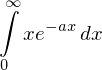

In [3]:
I1 = Integral(x*exp(-a*x), (x,0,oo))
I1

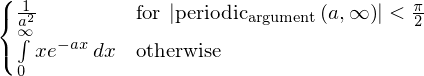

In [4]:
I1.doit()

Annahmen über die Variablen

In [5]:
a = Symbol('a', positive=True)

In [6]:
sqrt(a**2)

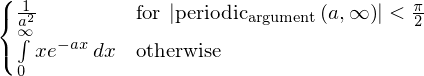

In [7]:
I1.doit() 

Das $a$ in I1 wurde nicht verändert.

In [8]:
I2 = Integral(x*exp(-a*x), (x,0,oo))  # neues I1
I2.doit()

In [9]:
a._assumptions

{'algebraic': None,
 'antihermitian': None,
 'commutative': True,
 'complex': True,
 'finite': None,
 'hermitian': True,
 'imaginary': False,
 'infinite': None,
 'irrational': None,
 'negative': False,
 'nonnegative': True,
 'nonpositive': False,
 'nonzero': True,
 'polar': None,
 'positive': True,
 'rational': None,
 'real': True,
 'zero': False}

In [10]:
n = Symbol('n', integer=True)
cos(pi*n)

## Summen und Reihen

In [11]:
n = Symbol('n')
j = Symbol('j')
q = Symbol('q')

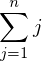

In [12]:
S1 = Sum(j, (j,1,n))   # Sum gibt es nur als trägen Operator
S1

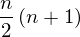

In [13]:
S1.doit().factor()

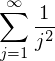

In [14]:
S2 = Sum(1/j**2, (j, 1, oo))
S2

In [15]:
S2.doit()

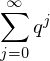

In [16]:
S3 = Sum(q**j, (j, 0, oo))
S3

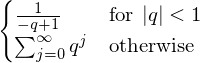

In [17]:
S3.doit()

Da kommen wir nur mit einem häßlichen Hack dran:

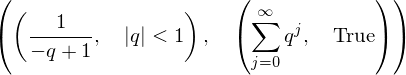

In [18]:
S3.doit().args

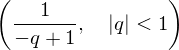

In [19]:
S3.doit().args[0]

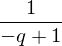

In [20]:
S3.doit().args[0][0]

## Sympy rechnet komplex

In [21]:
x = Symbol('x')
y = Symbol('y')
z = x+I*y
z

In [22]:
w = z**4
w

In [23]:
re(w).expand()

In [24]:
x = Symbol('x', real=True)
y = Symbol('y', real=True)
z = x+I*y
z

In [25]:
w = z**4
re(w)

In [26]:
im(w)

## numpy-Funktions

auch "universal functions" genannt

In [27]:
import numpy as np

In [28]:
xn = np.linspace(0, 1, 4)
xn

array([ 0.        ,  0.33333333,  0.66666667,  1.        ])

In [33]:
#sin(pi*xn) # mislingt
np.sin(np.pi*xn)

array([  0.00000000e+00,   8.66025404e-01,   8.66025404e-01,
         1.22464680e-16])

## Verwandlung von Ausdrücken in numpy-Funktionen

In [34]:
f = exp(-x/2) * sin(pi*x)
f

In [35]:
fn = lambdify(x, f, 'numpy')
fn

<function numpy.<lambda>>

In [36]:
f.subs(x, .5), fn(.5)

In [37]:
fn(xn)

array([  0.00000000e+00,   7.33074678e-01,   6.20534318e-01,
         7.42785831e-17])

## Funktionsgraphen

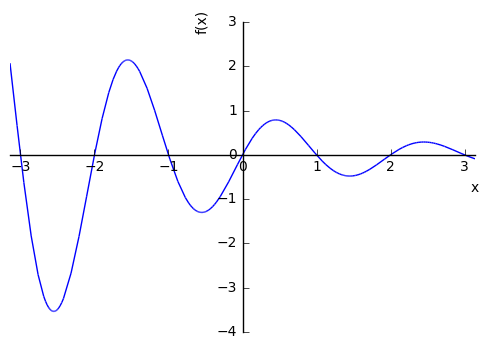

In [39]:
plot(f, (x, -pi, pi))

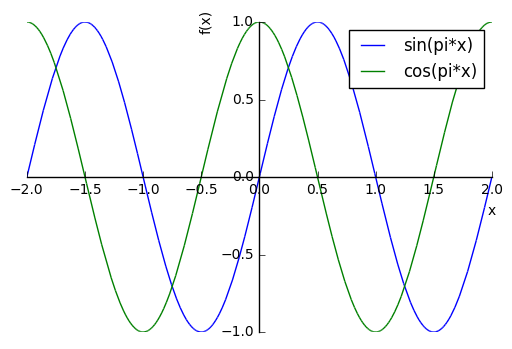

In [40]:
f = sin(pi*x)
g = cos(pi*x)
p1 = plot(f, (x, -2, 2), show=False)
p2 = plot(g, (x, -2, 2), show=False)
p1.extend(p2)
p1[1].line_color = 'green'
p1.legend = True
p1.show()

## Funktionsgraphen sind Numerik

In [41]:
import matplotlib.pyplot as plt

interaktiv:

In [42]:
%matplotlib notebook

für den Druck

In [ ]:
#%matplotlib inline    

<IPython.core.display.Javascript object>


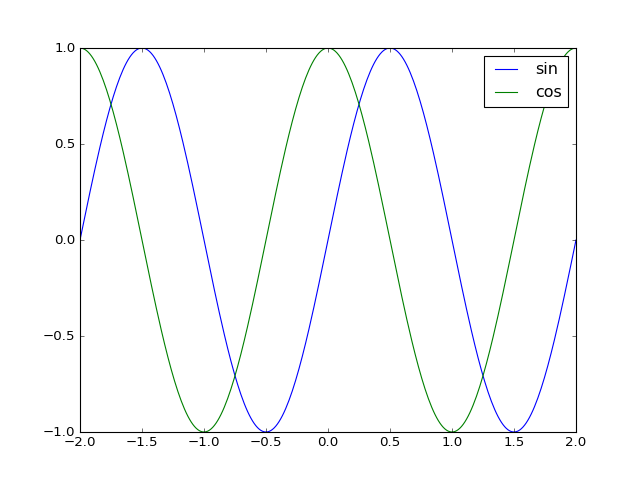

In [44]:
fn = lambdify(x, f, 'numpy')
gn = lambdify(x, g, 'numpy')
xn = np.linspace(-2, 2, 300)
plt.plot(xn, fn(xn), label='sin')
plt.plot(xn, gn(xn), label='cos')
plt.legend();

<IPython.core.display.Javascript object>


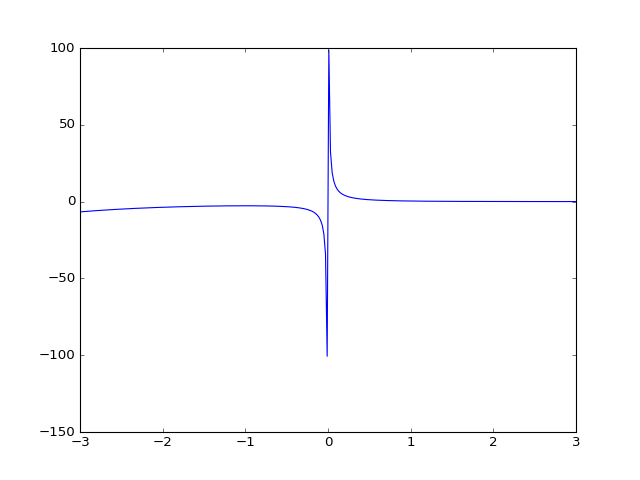

In [45]:
xn = np.linspace(-3, 3, 300)
h = exp(-x)/x
hn = lambdify(x, h, 'numpy')
plt.figure()    # schreibt sonst in den bereits geöffneten Plot,
                # wenn dieser noch nicht abgeschlossen ist
plt.plot(xn, hn(xn));

unbrauchbar

<IPython.core.display.Javascript object>


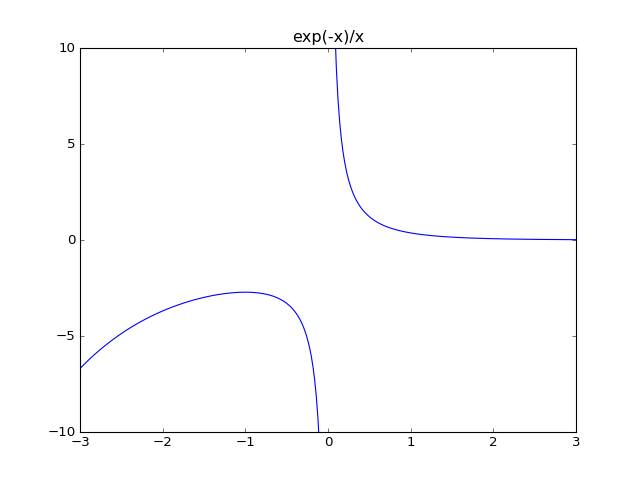

In [46]:
xp = np.linspace(.0001, 3, 150)
xm = -xp
plt.figure()
plt.plot(xp, hn(xp))
plt.plot(xm, hn(xm), 'b')  # mögliche Werte rgbcmykw
plt.axis(ymin=-10, ymax=10)
plt.title(str(h));

etwas eleganter

<IPython.core.display.Javascript object>


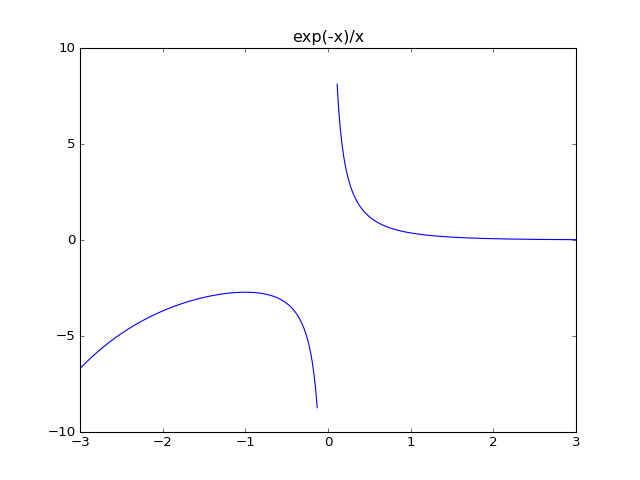

In [47]:
xn = np.linspace(-3, 3, 300)
plt.figure()
yn = hn(xn)
yn[abs(yn)>10] = np.nan
plt.plot(xn, yn)
plt.title(str(h));

## Index Tricks

In [48]:
xn = np.linspace(-.3, .3, 15)
yn = hn(xn)

/home/braun/miniconda3/lib/python3.5/site-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """


In [49]:
yn

array([ -4.49952936,  -5.02922724,  -5.78189079,  -6.9241629 ,
        -8.84490948, -12.71077499, -24.35507134,          inf,
        22.35445903,  10.70832512,   6.83939472,   4.91435258,
         3.76654949,   3.00711344,   2.46939407])

In [50]:
abs(yn) > 10

array([False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False], dtype=bool)

In [51]:
yn[abs(yn) > 10] = np.nan
yn

array([-4.49952936, -5.02922724, -5.78189079, -6.9241629 , -8.84490948,
               nan,         nan,         nan,         nan,         nan,
        6.83939472,  4.91435258,  3.76654949,  3.00711344,  2.46939407])

np.nan wird von den plot-Routinen ignoriert

## 3D Graphen

In [52]:
from sympy.plotting import plot3d

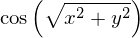

In [53]:
x = Symbol('x')
y = Symbol('y')
f = cos(sqrt(x**2+y**2))
f

<IPython.core.display.Javascript object>


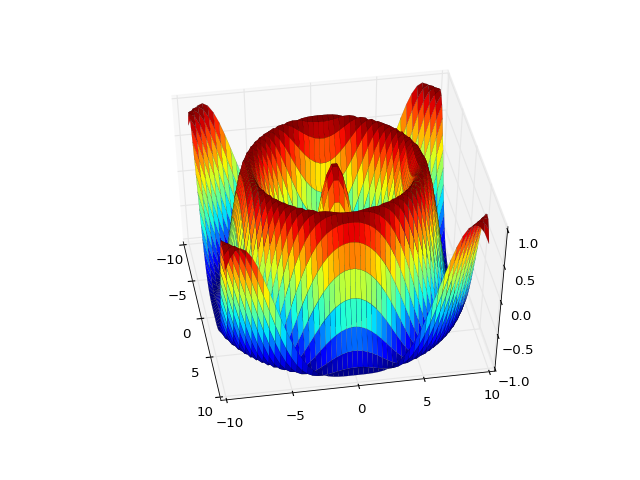

In [54]:
plot3d(f, (x, -3*pi, 3*pi), (y, -3*pi, 3*pi));

## 3D Graphen in matplotlib

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fn = lambdify((x,y), f, 'numpy')
f.subs(x,1.).subs(y,2.), fn(1,2)

In [ ]:
xn = np.linspace(-3*np.pi, 3*np.pi)
yn = np.linspace(-3*np.pi, 3*np.pi)
X, Y = np.meshgrid(xn, yn)
X.shape

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = fn(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap=plt.cm.coolwarm, linewidth=0);

In [ ]:
xn = np.linspace(-3*np.pi, 3*np.pi, 200)
yn = np.linspace(-3*np.pi, 3*np.pi, 200)
X, Y = np.meshgrid(xn, yn)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = fn(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap=plt.cm.coolwarm, linewidth=0, 
                alpha=.35);

Wenn's schnell gehen soll

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = fn(X, Y)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10);

In [ ]:
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')
Z = fn(X, Y)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.view_init(84, 23)                            # <----------

In [ ]:
xn = np.linspace(-3*np.pi, 3*np.pi, 200)
yn = np.linspace(-3*np.pi, 3*np.pi, 200)
X, Y = np.meshgrid(xn, yn)
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')
Z = fn(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap=plt.cm.coolwarm, linewidth=0)
ax.view_init(80, 23)

## Beschränkung der Höhe

In [ ]:
g = abs(tan(x+I*y))
gn = lambdify((x,y), g, 'numpy')
gn(1, 1)

In [ ]:
xn = np.linspace(-3*np.pi, 3*np.pi, 300)
yn = xn
X, Y = np.meshgrid(xn, yn)
Z = np.minimum(gn(X, Y), 5)
Z[Z>5] = np.nan

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.view_init(15,-120)

Der np.nan-Trick stört die automatische Farbgebung

In [ ]:
from matplotlib.colors import Normalize
norm = Normalize?

In [ ]:
norm = Normalize(.9, 1.1)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis, linewidth=0, 
                rstride=1, cstride=1, norm=norm)
ax.view_init(15,-120)